In [1]:
import numpy as np
from matplotlib import lines, pyplot as plt
from pathlib import Path
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import patches
#from tqdm import tqdm
#plt.rcParams.update({'font.size': 10})
#plt.style.use('sg_article')


In [2]:
def flatten(list_of_list):
    return np.array([item for sublist in list_of_list for item in sublist])

def plot_elements(edges, facets, alpha, ax, shift):
    #plot edges
    for edge in edges:
        edge[::2] += shift[0]
        edge[1::2] += shift[1]
        x1, y1, x2, y2 = edge
        ax.plot([x1, x2], [y1, y2], c = 'k')

    #plot facets
    for i, facet in enumerate(facets):
        facet[::2] += shift[0]
        facet[1::2] += shift[1]
        x1, y1, x2, y2, x3, y3 = facet
        path = [[x1, y1], [x2, y2], [x3, y3]]
        a = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        b = ((x3 - x2)**2 + (y3 - y2)**2)**0.5
        c = ((x1 - x3)**2 + (y1 - y3)**2)**0.5
        Circumradius = a * b * c / ((a + b + c) * (b + c - a) * (c + a - b) * (a + b - c))**0.5

        if Circumradius < alpha:
            ax.add_patch(patches.Polygon(path))

def plot_facets(facets, ax, shift):
    #plot facets
    for facet in facets:
        facet[::2] += shift[0]
        facet[1::2] += shift[1]
        x1, y1, x2, y2, x3, y3 = facet
        path = [[x1, y1], [x2, y2], [x3, y3]]
        ax.add_patch(patches.Polygon(path, color="red", ec="pink"))
        ax.scatter(facet[::2], facet[1::2], c = 'r', s = 2.0)

def plot_largest(ax):
    facets = np.load("data/largest.npy")
    plot_facets(np.copy(facets), ax, np.array([0,0]))
    plot_facets(np.copy(facets), ax, np.array([2048,0]))
    plot_facets(np.copy(facets), ax, np.array([-2048,0]))
    plot_facets(np.copy(facets), ax, np.array([0,2048]))
    plot_facets(np.copy(facets), ax, np.array([0,-2048]))
    plot_facets(np.copy(facets), ax, np.array([2048,2048]))
    plot_facets(np.copy(facets), ax, np.array([-2048,2048]))
    plot_facets(np.copy(facets), ax, np.array([-2048,-2048]))
    plot_facets(np.copy(facets), ax, np.array([2048,-2048]))

def plot_areas(alpha, ax):
    data_dir = Path("data")

    points = np.genfromtxt(data_dir / "pos.txt")
    edges = np.genfromtxt(data_dir / f"edges{alpha}.txt")
    facets = np.genfromtxt(data_dir / "facets.txt")

    # well if it works
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([0,0]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([2048,0]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([-2048,0]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([0,2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([0,-2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([2048,2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([-2048,2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([-2048,-2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([2048,-2048]))
	
    #plots points
    ax.scatter(points[:, 0], points[:, 1], c = 'r', s = 2.0, zorder = 10)
    ax.set(xlim=(0, 2048), ylim=(0, 2048) )


In [3]:
alpha_values = [100, 155, 200]

path = Path(f"data")

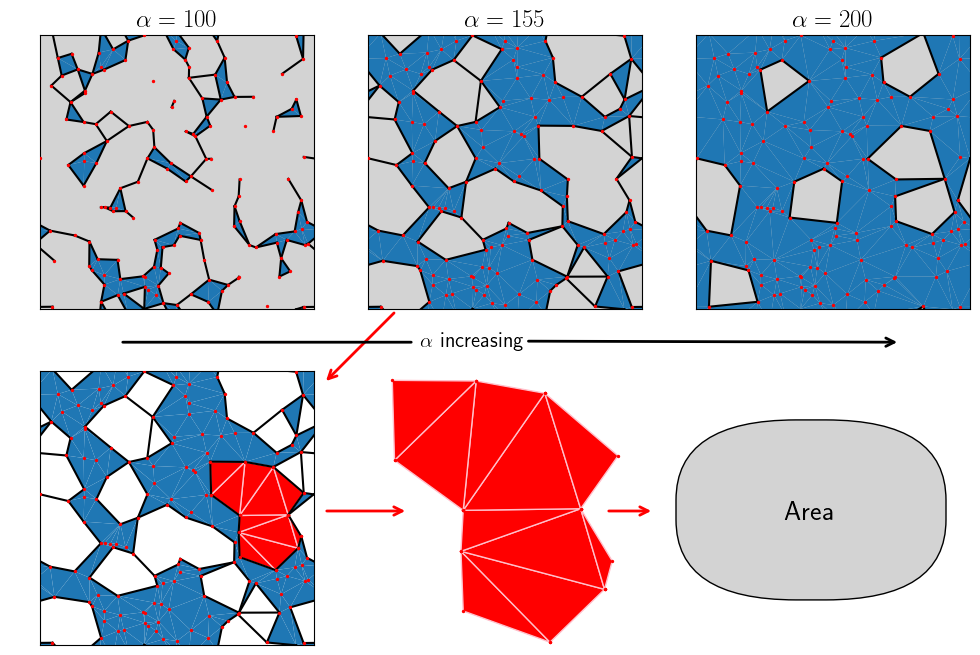

In [10]:

plt.rcParams.update({'font.size': 15})
# Create a figure
fig = plt.figure(figsize=(12, 8))#, constrained_layout=True)

plt.rcParams.update({
    "text.usetex": True})
# Define a GridSpec with 2 rows and 3 columns
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1.])  # Top row is smaller, bottom row is larger

# Add the three smaller plots in the top row
ax_pre = fig.add_subplot(gs[0, 0])  # First column, top row
ax_on = fig.add_subplot(gs[0, 1])  # Second column, top row
ax_post = fig.add_subplot(gs[0, 2])  # Third column, top row
ax_show_largest = fig.add_subplot(gs[1,0])  # Entire bottom row
ax_area = fig.add_subplot(gs[1,1])  # Entire bottom row

if 1:
    ax_pre.set(xticks=[], yticks=[], title=fr"$\alpha = {alpha_values[0]}$", aspect="equal", zorder=5)
    ax_on.set(xticks=[], yticks=[], title=fr"$\alpha = {alpha_values[1]}$", aspect="equal", zorder=5)
    ax_post.set(xticks=[], yticks=[], title=fr"$\alpha = {alpha_values[2]}$", aspect="equal", zorder=5)
    ax_show_largest.set(aspect="equal", xticks=[], yticks=[], xlim=(0, 2048), ylim=(0, 2048), )#zorder=5 )
    ax_area.set(xticks=[], yticks=[], xlim=(1200, 2048), ylim=(550, 1400), aspect="equal" )

    ax_pre.set_facecolor('lightgray')
    ax_on.set_facecolor('lightgray')
    ax_post.set_facecolor('lightgray')

plot_areas(alpha_values[0], ax_pre)
plot_areas(alpha_values[1], ax_on)
plot_areas(alpha_values[2], ax_post)
plot_areas(alpha_values[1], ax_show_largest)

if 1:
    plot_largest(ax_show_largest)
    plot_largest(ax_area)

    for spine in ax_area.spines.values():
        spine.set_visible(False)


    ax_on_coor = ax_on.get_position()
    ax_largest_coor = ax_show_largest.get_position()
    # Draw an arrow using figure coordinates

if 1:
    ax_area.annotate("", 
                xy=(0.27, 0.34), xycoords="figure fraction",  # Arrow end
                xytext=(0.33, 0.43), textcoords="figure fraction",  # Arrow start
                arrowprops=dict(arrowstyle="->", color="red", linewidth=2))

    ax_area.annotate("", 
                xy=(0.34, 0.18), xycoords="figure fraction",  # Arrow end
                xytext=(0.27, 0.18), textcoords="figure fraction",  # Arrow start
                arrowprops=dict(arrowstyle="->", color="red", linewidth=2))


    ax_area.annotate(r"$\alpha$ increasing", 
                xy=(0.75, 0.391), xycoords="figure fraction",  # Arrow end
                xytext=(0.35, 0.386), textcoords="figure fraction",  # Arrow start
                arrowprops=dict(arrowstyle="->", color="black", linewidth=2))

    ax_area.annotate("", 
                xy=(0.345, 0.391), xycoords="figure fraction",  # Arrow end
                xytext=(0.1, 0.391), textcoords="figure fraction",  # Arrow start
                arrowprops=dict(arrowstyle="-", color="black", linewidth=2))


    ax_area.annotate("", 
                xy=(0.545, 0.18), xycoords="figure fraction",  # Arrow end
                xytext=(0.505, 0.18), textcoords="figure fraction",  # Arrow start
                arrowprops=dict(arrowstyle="->", color="red", linewidth=2))

items = ["Area", "Radius of gyration"]

# Convert list to a formatted string
list_text = "\n\n".join(items)
if 1:
    # Add a rectangle (box) in figure coordinates
    box = patches.FancyBboxPatch((0.755, 0.27), 0.025, 0.025,  # (x, y, width, height)
                                transform=fig.transFigure, 
                                boxstyle="round,pad=0.1",
                                facecolor="lightgray", edgecolor="black")

    fig.patches.append(box)  # Add the box to the figure

# Add the list inside the box
fig.text(0.745, 0.27, items[0], fontsize=20, transform=fig.transFigure)
#fig.text(0.7, 0.255, items[1], fontsize=15, transform=fig.transFigure)
# plt.tight_layout()
#fig.subplots_adjust(hspace=-0.5, wspace=-0.5) 
# Show the plot
#fig.tight_layout()

save_path = f"C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Figures\\article\\alpha_schematic.jpeg"
save_path_eps = f"C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Figures\\article\\alpha_schematic.eps"
fig.savefig(save_path, dpi=620,bbox_inches='tight' )#dpi=420)
fig.savefig(save_path_eps,bbox_inches='tight' )#dpi=420)